In [1]:
import pickle
import numpy as np
from util.util import *
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=RuntimeWarning)



----------- KOSDAQ 2013 processing -----------
Number of NaN values: 0


  0%|          | 0/187 [00:00<?, ?it/s]

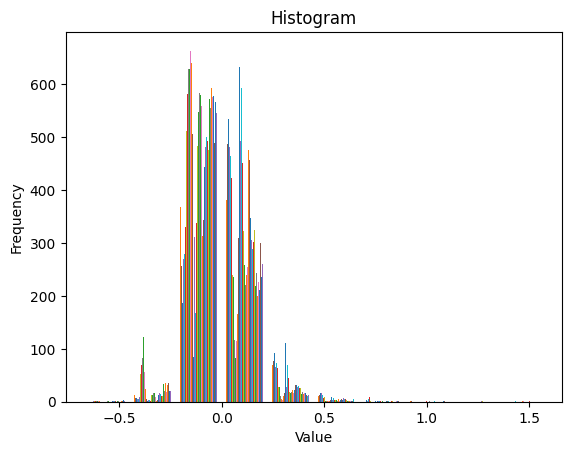

----------- KOSDAQ 2014 processing -----------
Number of NaN values: 0


  0%|          | 0/185 [00:00<?, ?it/s]

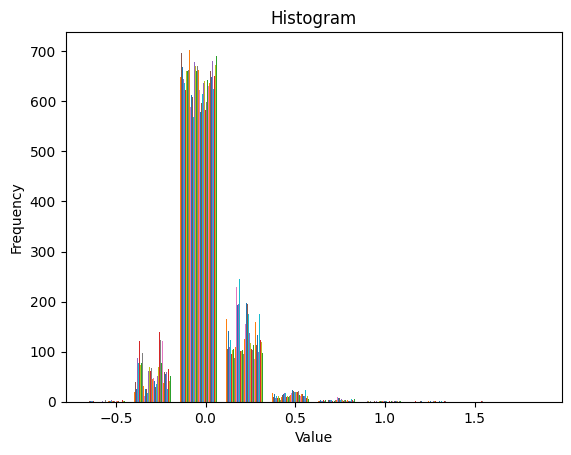

----------- KOSDAQ 2015 processing -----------
Number of NaN values: 0


  0%|          | 0/188 [00:00<?, ?it/s]

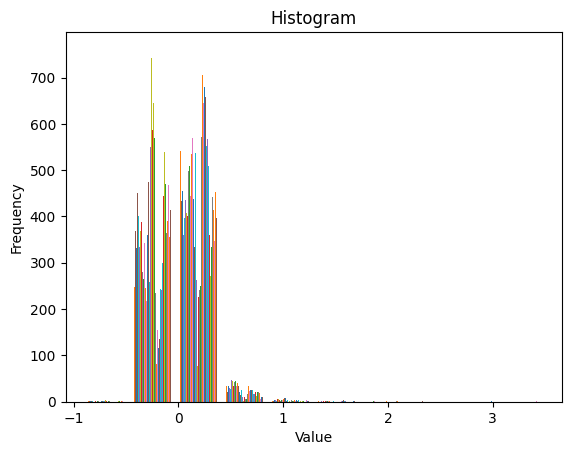

----------- KOSDAQ 2016 processing -----------
Number of NaN values: 0


  0%|          | 0/186 [00:00<?, ?it/s]

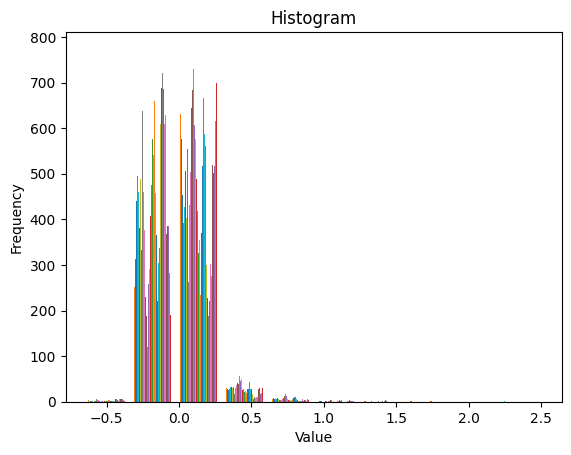

----------- KOSDAQ 2017 processing -----------
Number of NaN values: 0


  0%|          | 0/183 [00:00<?, ?it/s]

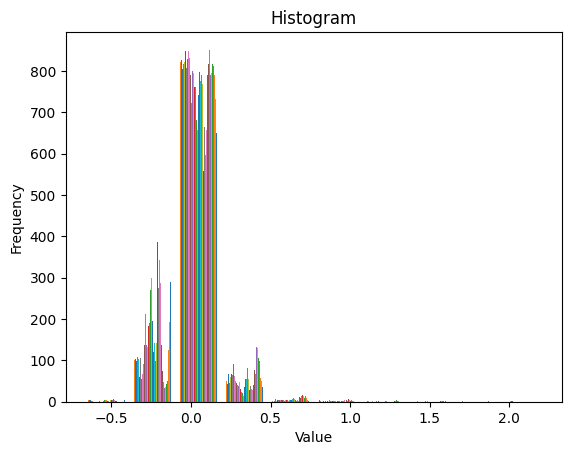

----------- KOSDAQ 2018 processing -----------
Number of NaN values: 0


  0%|          | 0/184 [00:00<?, ?it/s]

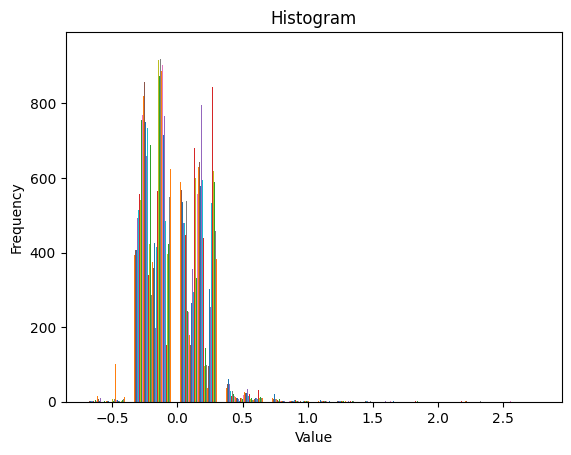

----------- KOSDAQ 2019 processing -----------
Number of NaN values: 0


  0%|          | 0/186 [00:00<?, ?it/s]

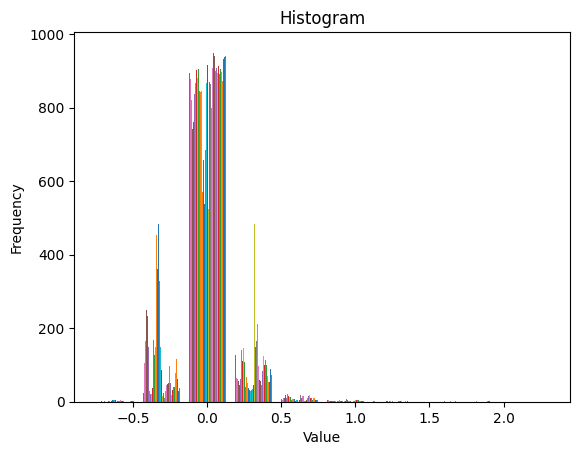

----------- KOSDAQ 2020 processing -----------
Number of NaN values: 0


  0%|          | 0/188 [00:00<?, ?it/s]

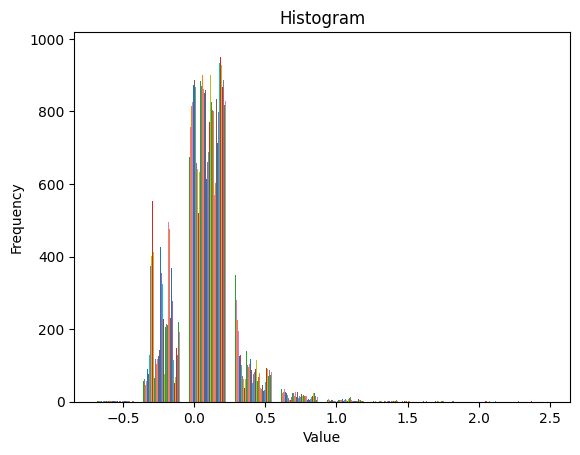

----------- KOSDAQ 2021 processing -----------
Number of NaN values: 0


  0%|          | 0/188 [00:00<?, ?it/s]

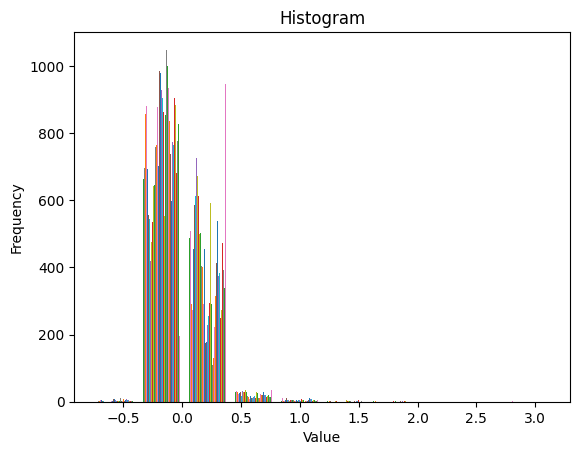

----------- KOSDAQ 2022 processing -----------
Number of NaN values: 0


  0%|          | 0/186 [00:00<?, ?it/s]

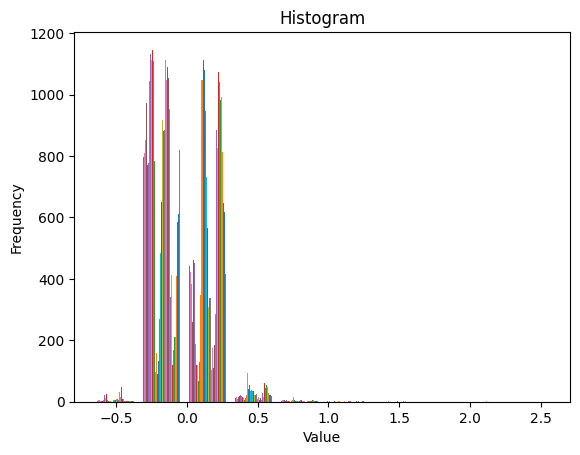

----------- KOSDAQ 2023 processing -----------
Number of NaN values: 0


  0%|          | 0/132 [00:00<?, ?it/s]

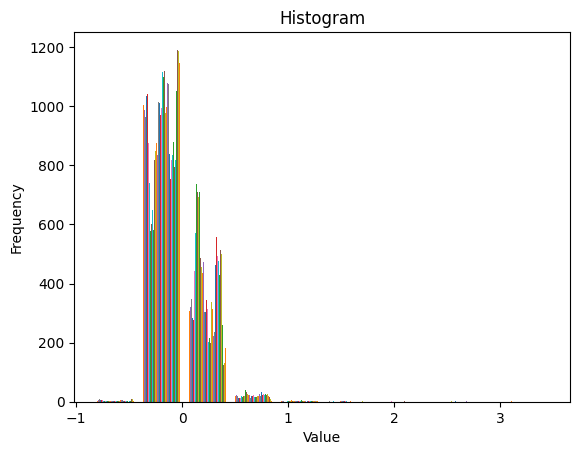

In [3]:
market = 'KOSDAQ'

years = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
# years = ['2022','2023']


for year in years : 
    print(f'----------- {market} {year} processing -----------')
    with open(f'./data/{market}/{market}_{year}.pkl', 'rb') as f:
        KOSPI_data = pickle.load(f)
        
    data = KOSPI_data['data']
    valid_ticker = KOSPI_data['valid_ticker']
    dimension = KOSPI_data['dimension']
    features = KOSPI_data['features']
    dates = KOSPI_data['dates']
    

    tickers_num, time_step, features_dim = data.shape

    window = 60
    predict_day_after = 20


    train_x = []
    train_y = []
    # close_rate = []

    num_nan = np.isnan(data).sum()
    print("Number of NaN values:", num_nan)



    for i in tqdm(range(time_step-window),total= time_step-window):
    
        temp = data[:,i:i+window,:].copy()
        
 
        try : 
            day_close = data[:,i+window-1,3]
            predict_day_close = data[:,i+window+predict_day_after,3]
        except : 
            break
        norm_X = normalize_data_per_ticker_new(temp)
        

        
        label = (predict_day_close - day_close) / day_close 

        # close_btw = data[:,i+window:i+window+predict_day_after,3]

        # close_rate_btw = (close_btw - day_close[:, np.newaxis])/day_close[:, np.newaxis]

        train_x.append(norm_X)
        train_y.append(label)
        # close_rate.append(close_rate_btw)
        
        
        
    plt.hist(train_y, bins=10)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()
    
    train_x_save = np.concatenate(train_x, axis=0)
    train_y_save = np.concatenate(train_y, axis=0)
    # close_rate_save = np.array(close_rate)


    np.save(f'./data/{market}/new_normalize_data2/{market}_{year}_train_x_norm_close2close.npy', train_x_save)
    np.save(f'./data/{market}/new_normalize_data2/{market}_{year}_train_y_norm_close2close.npy', train_y_save)
    # np.save(f'./data/{market}/new_normalize_data2/{market}_{year}_close_rate_btw.npy', close_rate_save)